In [1]:
import pandas as pd
from scipy.stats import uniform, differential_entropy, ks_2samp, kstest, entropy
from scipy.optimize import curve_fit
import numpy as np
import re
from ast import literal_eval
import networkx as nx
import pylab as plt
import matplotlib.pyplot as ptr
import imblearn

In [2]:

no_sims = 50
days = 300
steps_per_day = 30
data_per_sim = days * steps_per_day

dists = {}

ptrans = ['sigmoid','linear','random','constant'] 
dv_rvs = ['sigmoid','linear']
ind_inits = np.logspace(np.log10(4.5),np.log10(450),9)
ind_inits_strs = [re.sub('\.','_',str(round(h,2))) for h in ind_inits] 

for dv in dv_rvs:
    for pt in ptrans:
        for ind in ind_inits_strs:
            dists[dv + '_' + pt + '_' + ind] = pd.read_csv(dv + '_' + pt + '_' + ind + '.csv')

In [ ]:
dists_gen = {}

for df in dists:
    trees = []
    
    binned_gen = []
    bins_gen = list(range(0,40,1))
    for g in bins_gen:
        binned_gen.append([])
        
    for i in range(no_sims):
        data = dists[df][i*data_per_sim:(i+1)*data_per_sim]
#         data = data[data.astype(str) != '[]']
        data['Viral Load Tree'] = data['Viral Load Tree'].apply(lambda x: literal_eval(x))
#         data = [literal_eval(k['Viral Load Tree']) for k in data]
#         print(data)
        tree = nx.DiGraph()
        
        for i, row in data.iterrows():
            if not len(row['Viral Load Tree']) == 0:
                for i in row['Viral Load Tree']:
                    if tree.number_of_nodes() < 10000:
                        if tree.has_node(i[0]):
                            tree.add_node(i[1], init_v=round(row['Viral Load Tree'][i][1],2), time=round(row['Viral Load Tree'][i][3],2), 
                                gen=tree.nodes[i[0]]['gen'] + 1)
                            tree.add_edge(i[0],i[1], rec_init=round(row['Viral Load Tree'][i][1],2))
                        else:
                            tree.add_node(i[0], init_v=round(row['Viral Load Tree'][i][0],2), time=0, gen=0)
                            tree.add_node(i[1], init_v=round(row['Viral Load Tree'][i][1],2), time=round(row['Viral Load Tree'][i][3],2), 
                                gen=tree.nodes[i[0]]['gen'] + 1)
                            tree.add_edge(i[0],i[1],rec_init=round(row['Viral Load Tree'][i][1],2))
                            
        
        trees.append(tree)
        
    for tree in trees:
        for node in tree:
            bin_no_gen = np.digitize(tree.nodes[node]['gen'],bins_gen)
            if bin_no_gen < len(binned_gen):
                binned_gen[bin_no_gen].append(tree.nodes[node]['init_v'])
    
    dists_gen[df] = binned_gen
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
test = dists_gen['sigmoid_linear_450_0']

# diff_is = [differential_entropy(test[i])]

for i in range(len(test)):
    if test[i]:
        print(i, len(test[i]), np.median(test[i]),entropy(test[i]))

1 50 450.0 3.9120230054281455
2 99 415.62 4.415828910419366
3 148 349.97 4.737023232355902
4 224 232.31 5.076111877736526
5 267 190.02 5.174847333230671
6 317 156.98 5.324388785567466
7 344 184.425 5.432309247455786
8 372 179.31 5.475881402221841
9 399 212.79 5.571269204092811
10 447 204.04 5.698881762848959
11 488 223.59 5.788429002495883
12 494 157.435 5.749171170557634
13 458 156.435 5.675342411896644
14 454 188.28 5.6929900256667665
15 426 225.325 5.667458583752579
16 415 216.23 5.618497322191805
17 410 233.665 5.620974960254001
18 352 217.76 5.4576330069308785
19 339 203.29 5.435231279714662
20 340 190.515 5.4182118013022365
21 305 223.68 5.360010562795127
22 283 227.8 5.267085035474814
23 264 236.755 5.169502998896487
24 238 198.96 5.088752527433438
25 215 280.52 5.046645781860544
26 199 251.04 4.944100665769731
27 186 228.89 4.809705126924662
28 156 249.62 4.676487196253607
29 123 224.52 4.413719563972659
30 100 182.565 4.159086021160207
31 88 175.435 4.070267277255765
32 70 241

In [183]:
# WITH SIZE THRESHOLD

comp_gens = {}

for dist in dists_gen:
    comp_ents = []
    
    for i in range(len(dists_gen[dist])):
#         print(dist,len(dists_gen[dist][i]))
        if len(dists_gen[dist][i]) > 10:
            comp_ents.append(entropy(dists_gen[dist][i]))
        else:
            comp_ents.append(0)
    if comp_ents:
        print(dist, comp_ents)
        comp_gen = comp_ents.index(max(comp_ents))
        print(comp_gen)
        comp_gens[dist] = comp_gen

sigmoid_sigmoid_4_5 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
sigmoid_sigmoid_8_0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
sigmoid_sigmoid_14_23 [0, 0, 0, 0, 2.7185535378140075, 3.058326052679554, 3.0128020257432606, 3.6309322549444536, 3.9063788188494253, 4.070860040637168, 4.283843125781357, 4.471140251776794, 4.737197017284693, 4.870511896330789, 5.004845625297604, 5.090888574979945, 5.090340938675083, 5.094439387923895, 4.979655769876379, 4.8836712586274285, 4.771835225143458, 4.76993334959214, 4.659437480478032, 4.612781213870624, 4.218670851070522, 3.949407765433829, 3.900046002302, 3.4915612467223918, 3.1962648340316773, 2.7646723925975714, 2.658750932343549, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17
sigmoid_sigmoid_25_31 [0, 3.912023005428147, 4.060870398204431, 4.469197743999272, 4.981106892077267, 5.420347643036319, 5.694311620

In [10]:
# WITH OVERSAMPLING

dist_gens_oversample = dists_gen

sample_size = 500

comp_gens = {}

for dist in dist_gens_oversample:
    comp_ents = []
    
    for i in range(len(dist_gens_oversample[dist])):
        if len(dist_gens_oversample[dist][i]) > 5:
            comp_ents.append(differential_entropy(dist_gens_oversample[dist][i]))
        else:
            comp_ents.append(0)
#     print(sum(comp_ents))
    if sum(comp_ents) != 0:
        comp_gen = comp_ents.index(max(comp_ents))
        comp_gens[dist] = comp_gen
#         print(dists_gen[dist][comp_gen])
        if len(dist_gens_oversample[dist][comp_gen]) < sample_size:
            no_req = sample_size - len(dist_gens_oversample[dist][comp_gen])
            new_samples = np.random.choice(dist_gens_oversample[dist][comp_gen],size=no_req)
            print(new_samples)
            dist_gens_oversample[dist][comp_gen] = dist_gens_oversample[dist][comp_gen].append(new_samples)
            print(dist_gens_oversample[dist][comp_gen])
        



TypeError: object of type 'NoneType' has no len()

In [170]:
sample = 'sigmoid_sigmoid_450_0'

test = dists_gen[sample]
print(test)
# print(test[comp_gens[sample]])
for i in range(len(test)):
    print(np.median(test[i]))
    if test[i]:
        print(i, len(test[i]), np.median(test[i]),differential_entropy(test[i]), ks_2samp(test[i],test[comp_gens[sample]]))

[[], [450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0, 450.0], [323.55, 468.78, 449.15, 116.9, 461.9, 471.44, 463.44, 471.08, 472.42, 463.33, 313.01, 436.28, 446.86, 472.24, 437.42, 452.74, 367.13, 443.88, 464.72, 460.48, 452.15, 394.71, 380.41, 417.98, 456.77, 273.56, 445.58, 258.5, 230.98, 262.63, 142.07, 470.75, 470.43, 444.14, 429.51, 468.67, 436.42, 193.0, 381.86, 469.22, 93.36, 138.34, 438.3, 457.97, 357.81, 298.22, 408.2, 471.5, 168.39, 363.91, 474.44, 471.61, 466.9, 471.7, 466.87, 74.68, 411.26, 468.97, 20.98, 470.8, 469.54, 465.45, 469.29, 476.19, 470.35, 314.94, 471.8, 167.36, 469.41, 392.93, 346.67, 448.7, 194.04, 469.78, 433.04, 405.38, 468.97, 446.81, 378.23, 472.77, 169.36, 365.99, 4

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KstestResult(statistic=0.029912234532386298, pvalue=0.4556177292616187)
431.83
16 1407 431.83 5.420456216436748 KstestResult(statistic=0.03609732888132803, pvalue=0.26257018741210447)
432.45
17 1202 432.45 5.415483684468033 KstestResult(statistic=0.03464796088959938, pvalue=0.358622189909809)
433.14
18 997 433.14 5.414670756082812 KstestResult(statistic=0.04199280361894244, pvalue=0.21199387158079996)
430.77
19 909 430.77 5.444884315096711 KstestResult(statistic=0.03235121371828027, pvalue=0.5531346888139503)
426.11
20 821 426.11 5.488182285073178 KstestResult(statistic=0.028597560180806735, pvalue=0.7431676046804769)
430.58
21 651 430.58 5.460347725649065 KstestResult(statistic=0.017905317165031024, pvalue=0.9974816794297128)
426.44
22 565 426.44 5.5002776347152 KstestResult(statistic=0.02986751970368188, pvalue=0.8310002893844564)
425.99
23 486 425.99 5.46567140474643 KstestResult(statistic=0.028762545079099446, pvalue=0.9031159039763988)
425.61
24 384 425.61 5.44414239071714 KstestR

In [184]:
sim_gens = {}

for dist in dists_gen:
    sim_ks2samp = []
    gens_tracked = []
    
    for i in range(len(dists_gen[dist])):
        if dists_gen[dist][i] and dists_gen[dist][comp_gens[dist]]:
            sim_ks2samp.append(ks_2samp(dists_gen[dist][i],dists_gen[dist][comp_gens[dist]]))
            gens_tracked.append(i)
    if sim_ks2samp:
        sim_gens[dist] = [gens_tracked,sim_ks2samp]

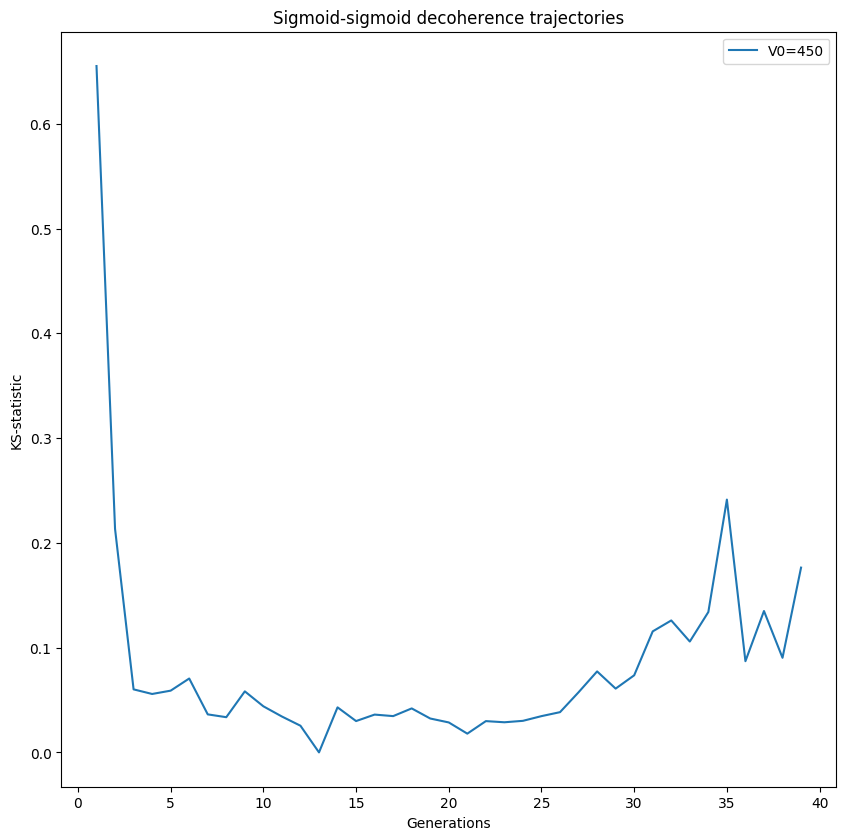

In [185]:
sample = 'sigmoid_sigmoid_450_0'

test = sim_gens[sample]

ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-sigmoid decoherence trajectories')
ax.set_ylabel("KS-statistic")
ax.set_xlabel("Generations")

stats = [h[0] for h in sim_gens[sample][1]]
p_vals = [h[1] for h in sim_gens[sample][1]]

ax.plot(sim_gens[sample][0],stats,label='V0=450')
# ax.plot(sim_gens[sample][0],p_vals,label='p-value')

ax.legend()

ptr.savefig(fname='Decoherence_trajetories_sample_450')

ptr.show()

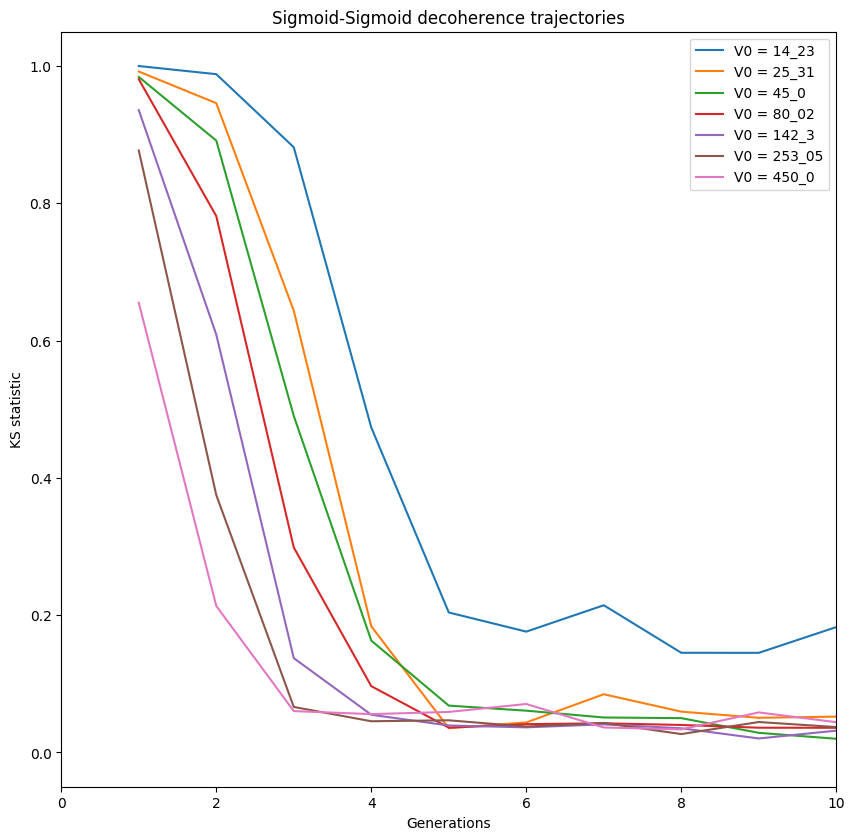

In [186]:
ptr.close('all')

sig_sig_group = []

for i in ind_inits_strs:
    sig_sig_group.append('sigmoid_sigmoid_' + i)
    
ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-Sigmoid decoherence trajectories', xlim=(0,10))
ax.set_ylabel("KS statistic")
ax.set_xlabel("Generations")    

for samp in sig_sig_group:
    
    if samp in sim_gens:
        sim_gen_cur = sim_gens[samp]


        stats = [h[0] for h in sim_gen_cur[1]]
        p_vals = [h[1] for h in sim_gen_cur[1]]

        ax.plot(sim_gen_cur[0],stats,label= 'V0 = ' + samp[16:])

ax.legend()

ptr.savefig(fname='Decoherence_trajetories_sig_sig')

ptr.show()

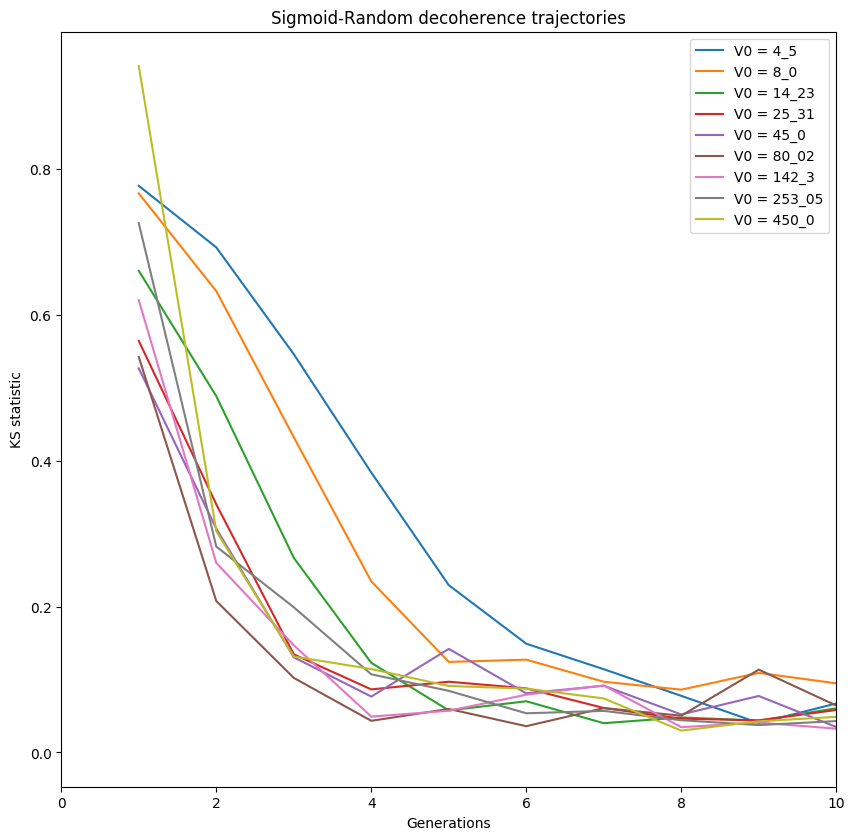

In [187]:
ptr.close('all')

sig_rand_group = []

for i in ind_inits_strs:
    sig_rand_group.append('sigmoid_random_' + i)
    
ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-Random decoherence trajectories',xlim=(0,10))
ax.set_ylabel("KS statistic")
ax.set_xlabel("Generations")    

for samp in sig_rand_group:
    
    if samp in sim_gens:
        sim_gen_cur = sim_gens[samp]


        stats = [h[0] for h in sim_gen_cur[1]]
        p_vals = [h[1] for h in sim_gen_cur[1]]

        ax.plot(sim_gen_cur[0],stats,label= 'V0 = ' + samp[15:])

ax.legend()

ptr.savefig(fname='Decoherence_trajetories_sig_rand')

ptr.show()

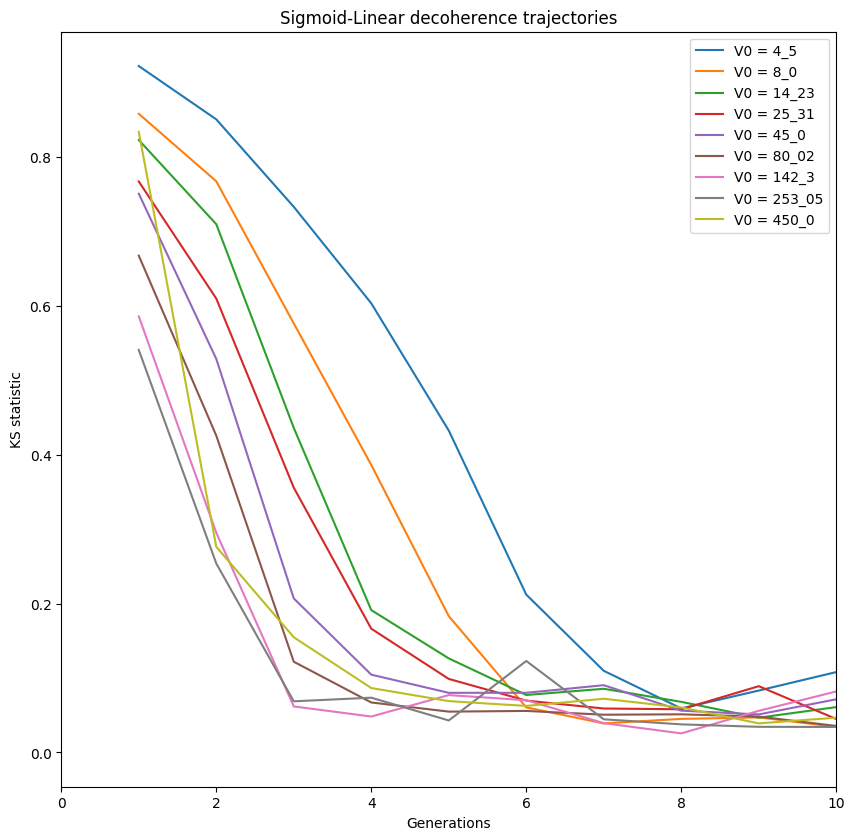

In [188]:
ptr.close('all')

sig_lin_group = []

for i in ind_inits_strs:
    sig_lin_group.append('sigmoid_linear_' + i)
    
ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-Linear decoherence trajectories', xlim=(0,10))
ax.set_ylabel("KS statistic")
ax.set_xlabel("Generations")    

for samp in sig_lin_group:
    
    if samp in sim_gens:
        sim_gen_cur = sim_gens[samp]


        stats = [h[0] for h in sim_gen_cur[1]]
        p_vals = [h[1] for h in sim_gen_cur[1]]

        ax.plot(sim_gen_cur[0],stats,label= 'V0 = ' + samp[15:])

ax.legend()

ptr.savefig(fname='Decoherence_trajetories_sig_lin')

ptr.show()

In [189]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

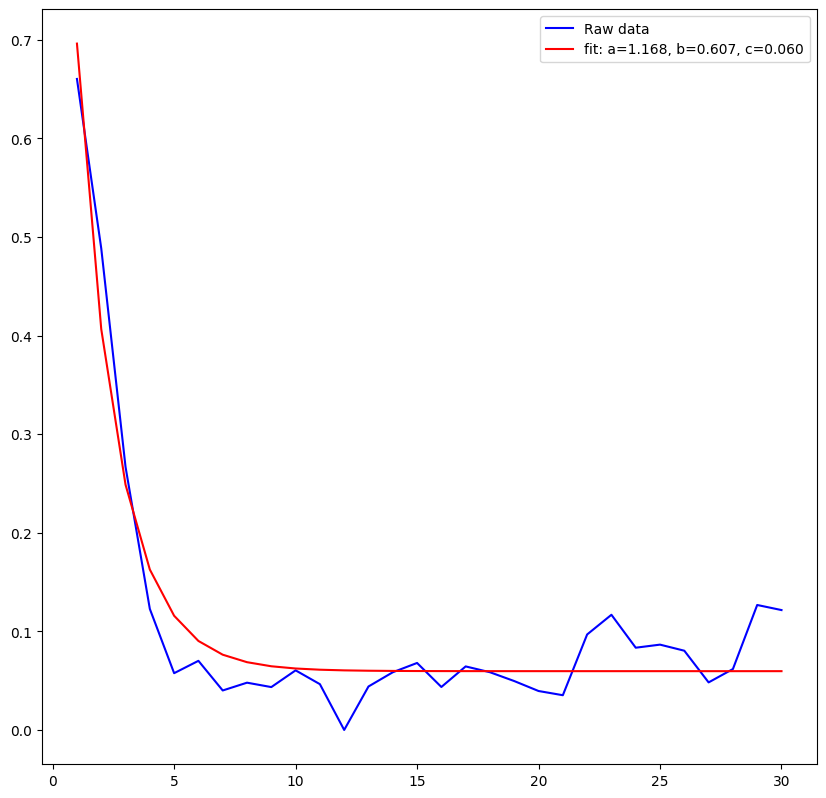

In [198]:
ptr.close('all')

ptr.figure(figsize=(10,10), dpi=100)

sample = 'sigmoid_random_14_23'

test = sim_gens[sample]

gens = np.array(test[0][:30])
stats = [h[0] for h in sim_gens[sample][1][:30]]
ptr.plot(gens,stats,'b-', label='Raw data')

popt, pcov = curve_fit(func, gens, stats)
plt.plot(gens, func(gens, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

ptr.legend()

ptr.savefig(fname='Sample_fit')

In [191]:
decay_terms = []

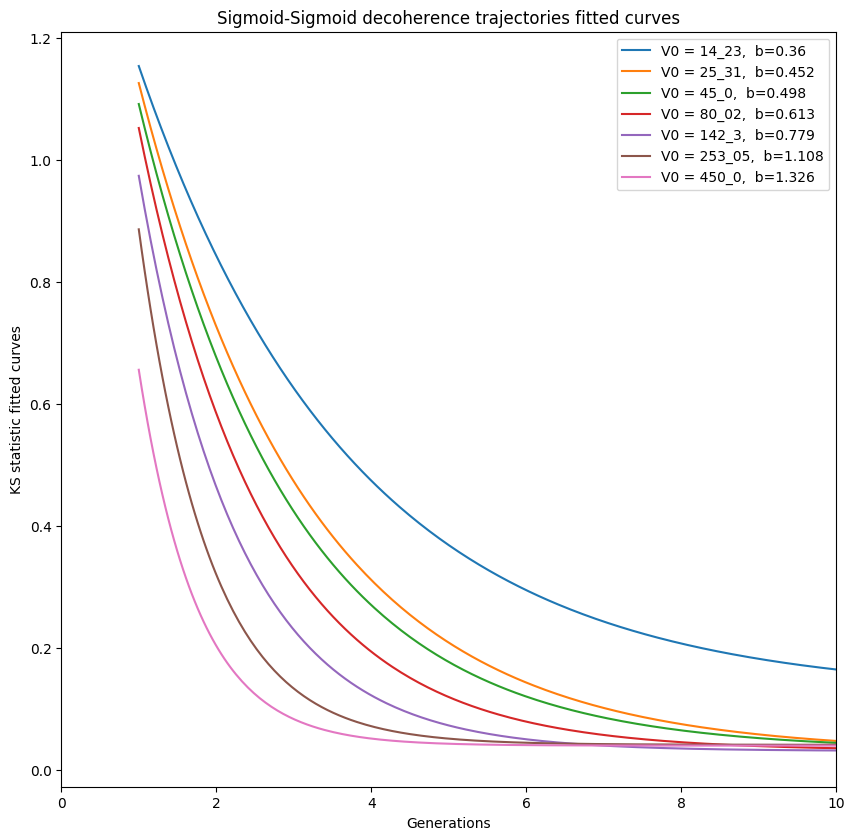

In [204]:
ptr.close('all')

sig_sig_group = []

sig_sig_vos = []
sig_sig_decay = []

for i in ind_inits_strs:
    sig_sig_group.append('sigmoid_sigmoid_' + i)
    
ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-Sigmoid decoherence trajectories fitted curves', xlim=(0,10))
ax.set_ylabel("KS statistic fitted curves")
ax.set_xlabel("Generations")    

for samp in sig_sig_group:
    
    if samp in sim_gens:
        sim_gen_cur = sim_gens[samp]
        
        gens = np.array(sim_gen_cur[0][:30])
        gens_fit = np.linspace(sim_gen_cur[0][0],sim_gen_cur[0][-1],num=1000)
        
        stats = [h[0] for h in sim_gen_cur[1][:30]]
        
        popt, pcov = curve_fit(func, gens, stats)
        
        fit = func(gens_fit, *popt)
        
        sig_sig_vos.append(samp[16:])
        sig_sig_decay.append(round(popt[1],3))
        
        ax.plot(gens_fit,fit,label= 'V0 = ' + samp[16:] + ', ' + ' b=' + str(round(popt[1],3)))
    else:
        sig_sig_vos.append(samp[16:])
        sig_sig_decay.append(0)

ax.legend()

ptr.savefig(fname='sig_sig_fitted')

ptr.show()

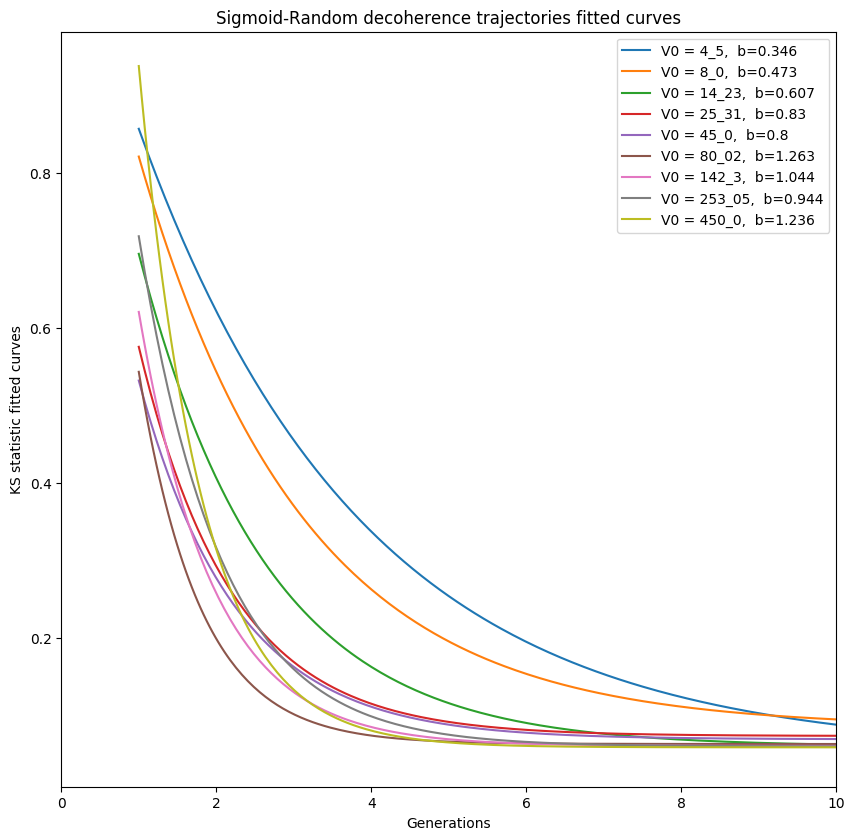

In [202]:
ptr.close('all')

sig_rand_group = []

sig_rand_vos = []
sig_rand_decay = []

for i in ind_inits_strs:
    sig_rand_group.append('sigmoid_random_' + i)
    
ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-Random decoherence trajectories fitted curves', xlim=(0,10))
ax.set_ylabel("KS statistic fitted curves")
ax.set_xlabel("Generations")    

for samp in sig_rand_group:
    
    if samp in sim_gens:
        sim_gen_cur = sim_gens[samp]
        
        gens = np.array(sim_gen_cur[0][:30])
        gens_fit = np.linspace(sim_gen_cur[0][0],sim_gen_cur[0][-1],num=1000)
        
        stats = [h[0] for h in sim_gen_cur[1][:30]]
        
        popt, pcov = curve_fit(func, gens, stats)
        
        fit = func(gens_fit, *popt)
        
        sig_rand_vos.append(samp[15:])
        sig_rand_decay.append(round(popt[1],3))
        
        ax.plot(gens_fit,fit,label= 'V0 = ' + samp[15:] + ', ' + ' b=' + str(round(popt[1],3)))
    else:
        sig_rand_vos.append(samp[15:])
        sig_rand_decay.append(0)

ax.legend()

ptr.savefig(fname='sig_rand_fitted')

ptr.show()

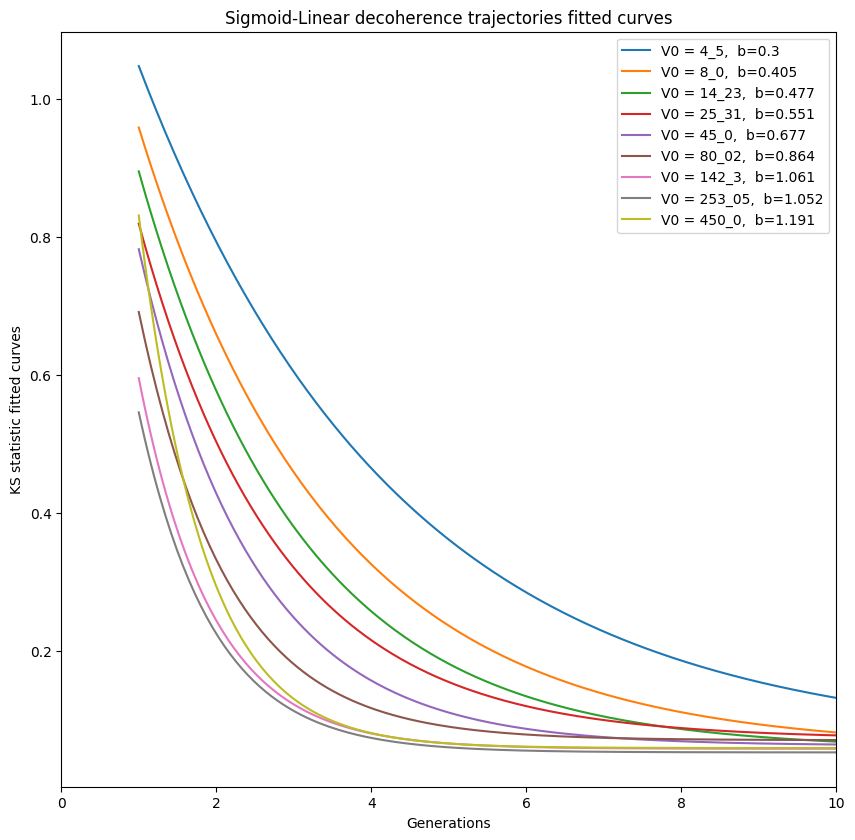

In [203]:
ptr.close('all')

sig_lin_group = []

sig_lin_vos = []
sig_lin_decay = []

for i in ind_inits_strs:
    sig_lin_group.append('sigmoid_linear_' + i)
    
ptr.figure(figsize=(10,10), dpi=100)

ax = ptr.subplot(111, title='Sigmoid-Linear decoherence trajectories fitted curves', xlim=(0,10))
ax.set_ylabel("KS statistic fitted curves")
ax.set_xlabel("Generations")    

for samp in sig_lin_group:
    
    if samp in sim_gens:
        sim_gen_cur = sim_gens[samp]
        
        gens = np.array(sim_gen_cur[0][:30])
        gens_fit = np.linspace(sim_gen_cur[0][0],sim_gen_cur[0][-1],num=1000)
        
        stats = [h[0] for h in sim_gen_cur[1][:30]]
        
        popt, pcov = curve_fit(func, gens, stats)
        
        fit = func(gens_fit, *popt)
        
        sig_lin_vos.append(samp[15:])
        sig_lin_decay.append(round(popt[1],3))
        
        ax.plot(gens_fit,fit,label= 'V0 = ' + samp[15:] + ', ' + ' b=' + str(round(popt[1],3)))
    else:
        sig_lin_vos.append(samp[15:])
        sig_lin_decay.append(0)

ax.legend()

ptr.savefig(fname='sig_lin_fitted')

ptr.show()

<Figure size 1000x1000 with 0 Axes>

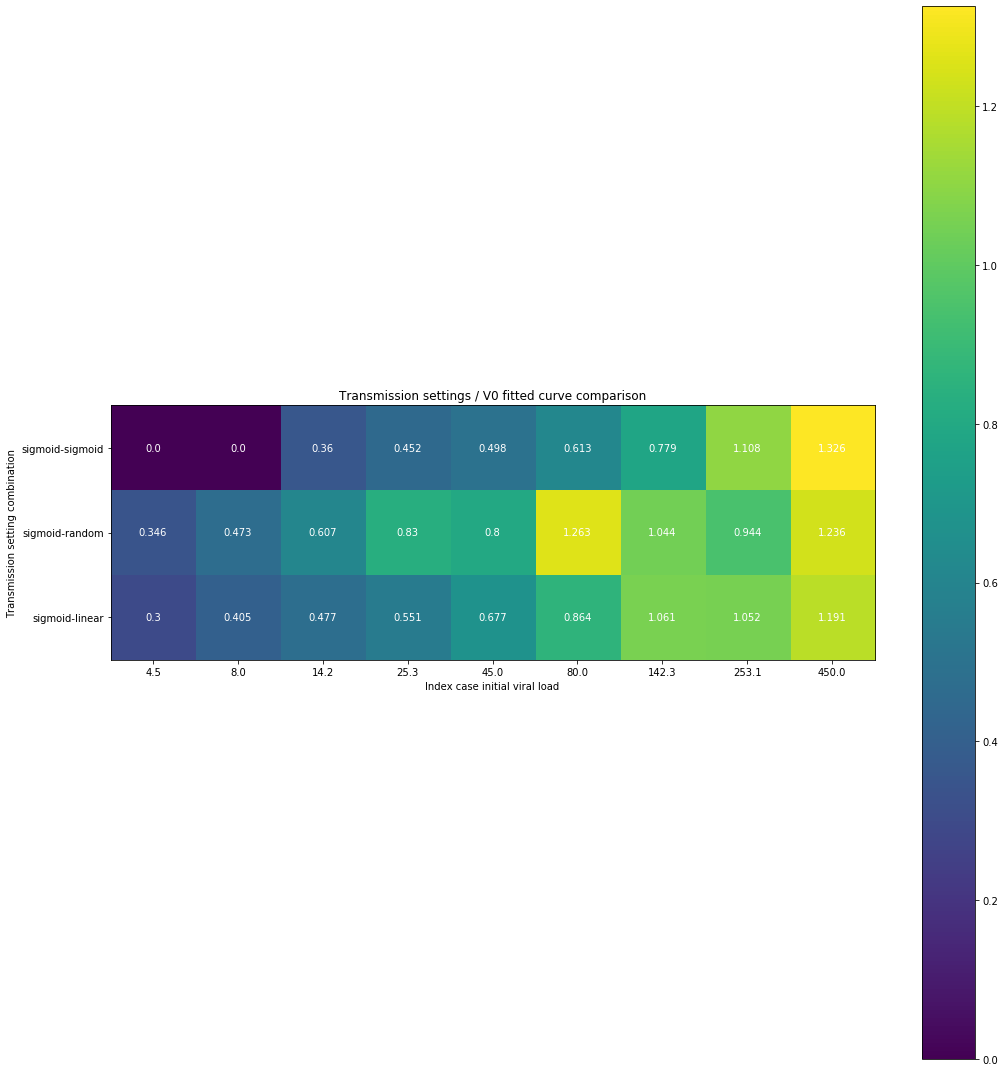

In [205]:
ptr.close('all')
ptr.figure(figsize=(10,10), dpi=100)

fig, ax0 = ptr.subplots(1, 1)

fig.set_figheight(15)
fig.set_figwidth(15)

y = ['sigmoid-sigmoid','sigmoid-random','sigmoid-linear']

decays = [np.array(sig_sig_decay)]
decays.append(sig_rand_decay)
decays.append(sig_lin_decay)

c = ax0.imshow(decays)
ax0.set_title('Transmission settings / V0 fitted curve comparison')

fig.colorbar(c, ax=ax0)

ax0.set_yticks(range(len(decays)))
ax0.set_yticklabels(y)
ax0.set_ylabel('Transmission setting combination')

ax0.set_xticks(range(len(ind_inits)))
ax0.set_xticklabels([round(h,1) for h in ind_inits])
ax0.set_xlabel('Index case initial viral load')

for i in range(len(decays)):
    for j in range(len(decays[0])):
        text = ax0.text(j, i, decays[i][j],
                       ha="center", va="center", color="w")

fig.tight_layout()

ptr.savefig(fname='trans_setting_comp')
ptr.show()